In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('iris.data')

In [4]:
df

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Iris-virginica
146,146,6.3,2.5,5.0,1.9,Iris-virginica
147,147,6.5,3.0,5.2,2.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.info

<bound method DataFrame.info of       id  sepal_length  sepal_width  petal_length  petal_width         species
0      0           5.1          3.5           1.4          0.2     Iris-setosa
1      1           4.9          3.0           1.4          0.2     Iris-setosa
2      2           4.7          3.2           1.3          0.2     Iris-setosa
3      3           4.6          3.1           1.5          0.2     Iris-setosa
4      4           5.0          3.6           1.4          0.2     Iris-setosa
..   ...           ...          ...           ...          ...             ...
145  145           6.7          3.0           5.2          2.3  Iris-virginica
146  146           6.3          2.5           5.0          1.9  Iris-virginica
147  147           6.5          3.0           5.2          2.0  Iris-virginica
148  148           6.2          3.4           5.4          2.3  Iris-virginica
149  149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 6 colum

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df = df.drop('id',axis = 1)

In [12]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
cols=['sepal_length',	'sepal_width',	'petal_length',	'petal_width']
df.rename(columns={cols[0]:0, cols[1]:1,cols[2]:2, cols[3]:3}, inplace=True)
df.loc[::50]

,0,1,2,3,species
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [20]:
print(df.shape)

(150, 5)


In [21]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
df.species.value_counts()
#df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

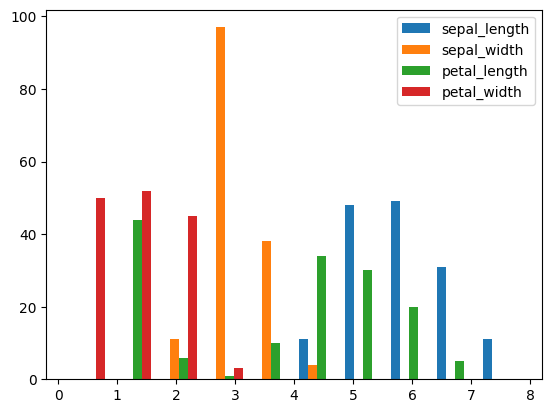

In [38]:
plt.hist([df[0],df[1],df[2],df[3]], label=[cols[0], cols[1],cols[2], cols[3]])
plt.legend()

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

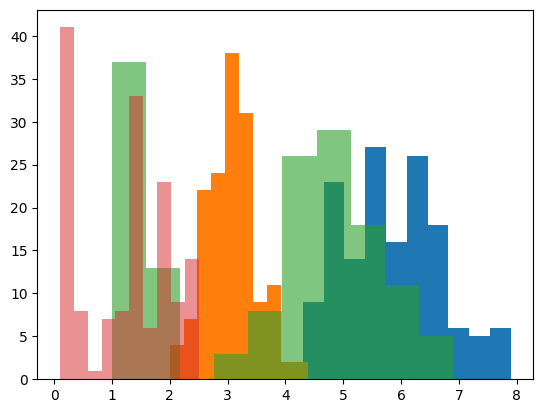

In [43]:
plt.hist(df[0])
plt.hist(df[1], alpha=1)
plt.hist(df[2], alpha=0.6)#alpha is for the transparency level
plt.hist(df[3], alpha=0.5)

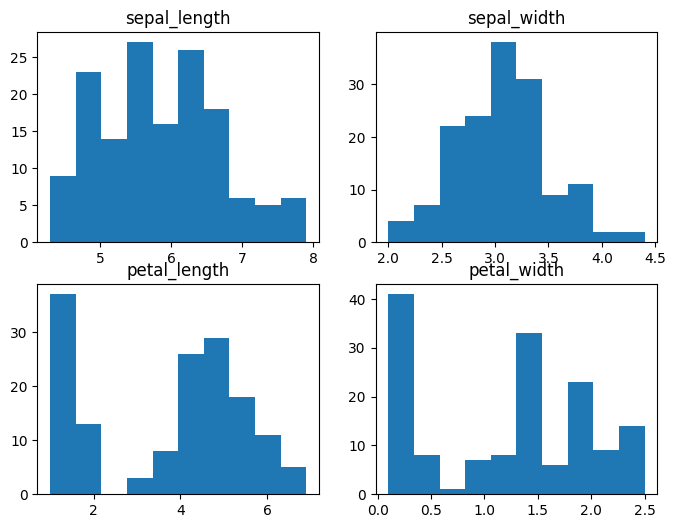

In [52]:
fig, ax =plt.subplots(2,2, figsize=(8,6))
ax[0,0].hist(df[0])
ax[0,1].hist(df[1])
ax[1,0].hist(df[2])
ax[1,1].hist(df[3])
ax[0,0].set_title(cols[0])
ax[0,1].set_title(cols[1])
ax[1,0].set_title(cols[2])
ax[1,1].set_title(cols[3])
plt.show()

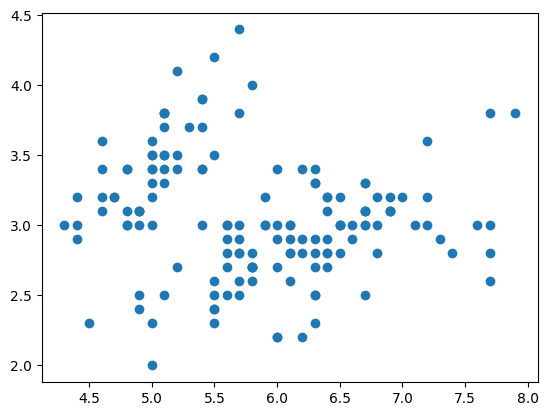

In [53]:
plt.scatter(
    df[0],
    df[1])

Text(0, 0.5, 'petal_width')

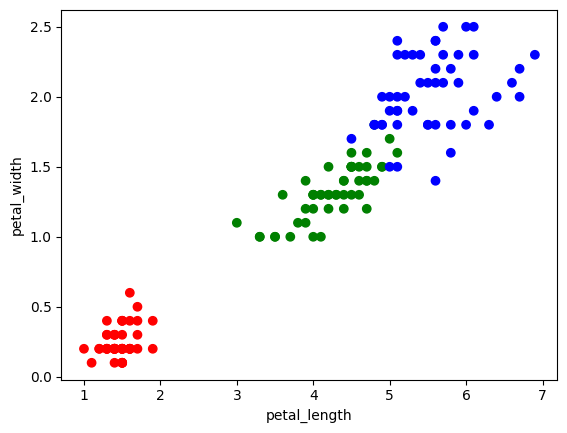

In [62]:
colors={'Iris-setosa':'red','Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(
    df[2],
    df[3],
    c=df['species'].map(colors))
plt.xlabel(cols[2])
plt.ylabel(cols[3])

Text(0, 0.5, 'petal_length')

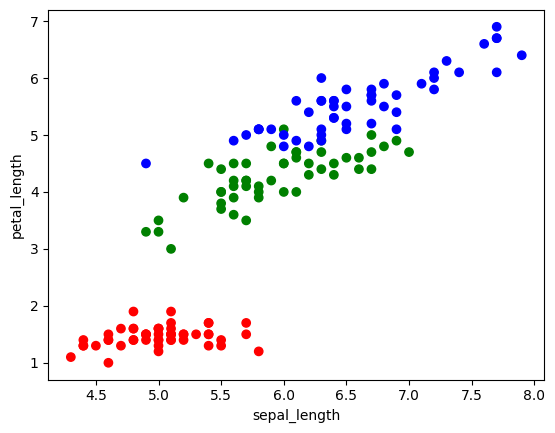

In [63]:
colors={'Iris-setosa':'red','Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(
    df[0],
    df[2],
    c=df['species'].map(colors))
plt.xlabel(cols[0])
plt.ylabel(cols[2])

Text(0.5, 1.0, 'Iris Data Scatter Plot')

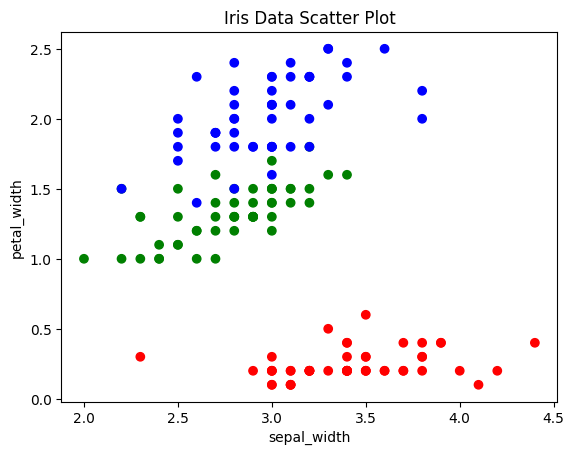

In [64]:
colors={'Iris-setosa':'red','Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(
    df[1],
    df[3],
    c=df['species'].map(colors))
plt.xlabel(cols[1])
plt.ylabel(cols[3])
plt.title('Iris Data Scatter Plot')

In [66]:
df.corr(numeric_only=True)

,0,1,2,3
0,1.000000,-0.109369,0.871754,0.817954
1,-0.109369,1.000000,-0.420516,-0.356544
2,0.871754,-0.420516,1.000000,0.962757
3,0.817954,-0.356544,0.962757,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x20da67d79d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20da67d7c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x20da67d7890>,
 'medians': [<matplotlib.lines.Line2D at 0x20da67d7ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x20da6824050>,
 'means': []}

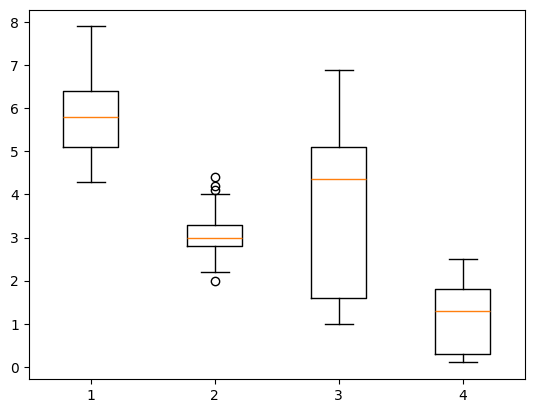

In [67]:
plt.boxplot([df[0],df[1],df[2],df[3]])